I use this file to practice all code which could be used on desktop.
I will try to do things which does not need sagemaker services.

In [1]:
import sys
from urllib.request import urlretrieve
import zipfile
from dateutil.parser import parse
import json
from random import shuffle
import random
import datetime
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import IntSlider, FloatSlider, Checkbox

Matplotlib is building the font cache; this may take a moment.


In [2]:
np.random.seed(42)
random.seed(42)

In [3]:
data = pd.read_csv('LD2011_2014.txt', sep=";", index_col=0, parse_dates=True, decimal=',')
data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(140256, 370)

In [5]:
data.tail()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.175240,249.158249,62.937063,69.892473,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


In [27]:
df = data.iloc[-35040: , :100]

df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100
2014-01-01 00:15:00,2.538071,23.470839,0.0,150.406504,73.170732,288.690476,6.218202,235.690236,47.202797,67.741935,...,67.378252,32.710280,1.015228,7.074280,3.143007,6.376812,157.563025,252.059308,402.34375,10.652463
2014-01-01 00:30:00,2.538071,23.470839,0.0,148.373984,78.048780,267.857143,6.783493,252.525253,52.447552,67.741935,...,66.044029,33.229491,1.015228,10.106114,3.143007,6.956522,170.168067,245.469522,394.53125,11.318242
2014-01-01 00:45:00,2.538071,24.182077,0.0,144.308943,74.390244,255.952381,6.218202,249.158249,50.699301,63.440860,...,70.713809,33.229491,1.522843,7.579586,3.143007,5.797101,174.369748,200.988468,257.81250,10.652463
2014-01-01 01:00:00,2.538071,23.470839,0.0,136.178862,74.390244,252.976190,6.218202,249.158249,52.447552,72.043011,...,72.715143,33.229491,1.522843,6.568974,3.143007,5.797101,172.268908,191.103789,253.90625,9.986684
2014-01-01 01:15:00,3.807107,22.759602,0.0,152.439024,70.731707,250.000000,6.783493,252.525253,52.447552,69.892473,...,74.716478,33.229491,1.015228,8.590197,3.143007,6.956522,165.966387,210.873147,261.71875,10.652463


In [12]:
24*4*365

35040

In [28]:
df.shape

(35040, 100)

In [29]:
df.to_csv("electric.csv", index = True)

In [30]:
data_kw = df.resample('2H').sum() / 8

In [32]:
data_kw.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100
2014-01-01 00:00:00,2.379442,20.536984,0.0,128.302846,63.719512,218.377976,5.370266,217.171717,44.798951,59.543011,...,61.957972,29.075805,1.078680,7.263770,2.750131,5.797101,145.220588,190.691928,265.136719,9.404128
2014-01-01 02:00:00,2.855330,23.204125,0.0,134.654472,64.786585,196.056548,5.723573,229.797980,49.825175,59.543011,...,72.548366,32.450675,1.522843,8.653360,3.470403,6.956522,163.077731,184.925865,252.441406,10.236352
2014-01-01 04:00:00,2.538071,21.870555,0.0,108.231707,60.213415,149.925595,4.663652,183.080808,41.083916,52.016129,...,75.633756,32.320872,1.205584,8.716523,3.273965,7.028986,163.340336,183.690280,187.011719,10.985353
2014-01-01 06:00:00,3.013959,21.781650,0.0,93.495935,58.384146,142.485119,4.592990,154.882155,37.587413,49.865591,...,71.214143,44.911734,1.522843,7.769075,20.560503,7.246377,155.462185,177.924217,256.835938,10.069907
2014-01-01 08:00:00,0.793147,24.004267,0.0,80.792683,46.951220,135.416667,4.098361,119.107744,55.069930,38.306452,...,67.878586,51.336968,1.269036,6.442648,15.976951,6.666667,170.430672,207.166392,332.031250,10.486019


In [40]:
timeseries = []

In [34]:
num_timeseries = df.shape[1]

In [41]:
for i in range(num_timeseries):
    timeseries.append(np.trim_zeros(data_kw.iloc[:,i], trim='f'))

In [42]:
timeseries

[2014-01-01 00:00:00    2.379442
 2014-01-01 02:00:00    2.855330
 2014-01-01 04:00:00    2.538071
 2014-01-01 06:00:00    3.013959
 2014-01-01 08:00:00    0.793147
                          ...   
 2014-12-31 16:00:00    2.379442
 2014-12-31 18:00:00    2.220812
 2014-12-31 20:00:00    2.379442
 2014-12-31 22:00:00    2.062183
 2015-01-01 00:00:00    0.317259
 Freq: 2H, Name: MT_001, Length: 4381, dtype: float64,
 2014-01-01 00:00:00    20.536984
 2014-01-01 02:00:00    23.204125
 2014-01-01 04:00:00    21.870555
 2014-01-01 06:00:00    21.781650
 2014-01-01 08:00:00    24.004267
                          ...    
 2014-12-31 16:00:00    28.538407
 2014-12-31 18:00:00    28.449502
 2014-12-31 20:00:00    24.004267
 2014-12-31 22:00:00    21.692745
 2015-01-01 00:00:00     2.489331
 Freq: 2H, Name: MT_002, Length: 4381, dtype: float64,
 2014-01-02 00:00:00    1.520417
 2014-01-02 02:00:00    1.737619
 2014-01-02 04:00:00    1.737619
 2014-01-02 06:00:00    1.737619
 2014-01-02 08:00:00 

In [44]:
len(timeseries[0]) # it is list 100 of lists of 4381

4381

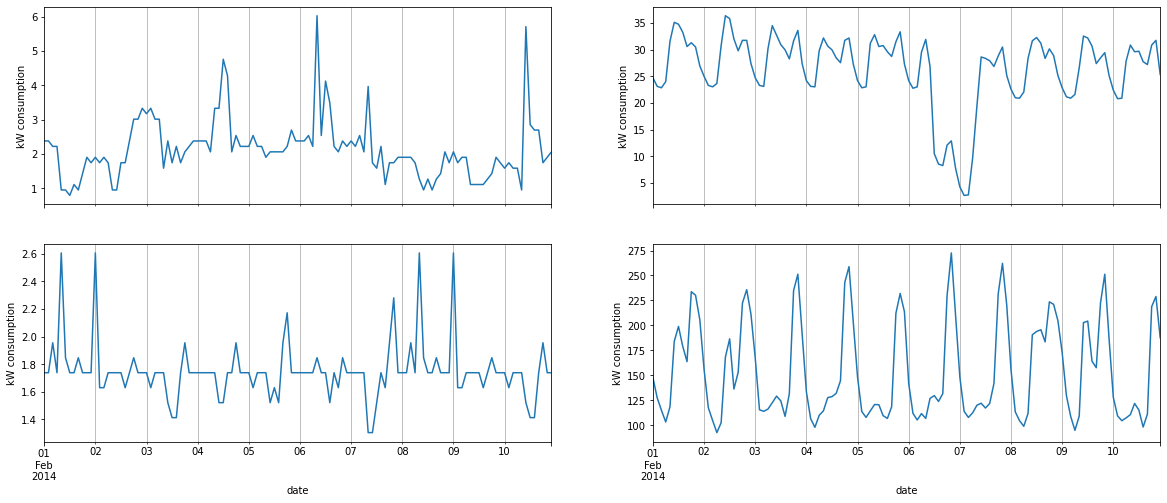

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(20, 8), sharex=True)
axx = axs.ravel()
for i in range(0, 4):
    timeseries[i].loc["2014-02-01":"2014-02-10"].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("kW consumption")   
    axx[i].grid(which='minor', axis='x')

In [47]:
freq = '2H'

In [54]:
# we predict for 3 days
prediction_length = 3 * 12
context_length = 3 * 12

In [55]:
start_dataset = pd.Timestamp("2014-01-01 00:00:00", freq=freq)
end_training = pd.Timestamp("2014-12-26 00:00:00", freq=freq)

In [58]:
str(start_dataset)


'2014-01-01 00:00:00'

In [59]:
training_data = [
    {
        "start": str(start_dataset),
        "target": ts[start_dataset:end_training - timedelta(days=1)].tolist()  # We use -1, because pandas indexing includes the upper bound 
    }
    for ts in timeseries
]
print(len(training_data))

100


In [64]:
mid_training = pd.Timestamp("2014-01-02 00:00:00", freq=freq)
(timeseries[0][start_dataset:mid_training]).tolist()

[2.3794416243654837,
 2.85532994923858,
 2.53807106598985,
 3.013959390862945,
 0.7931472081218263,
 0.47588832487309496,
 0.47588832487309496,
 0.47588832487309496,
 2.2208121827411174,
 2.85532994923858,
 2.53807106598985,
 2.85532994923858,
 2.696700507614215]

In [72]:
training_data[0]['target']

[2.3794416243654837,
 2.85532994923858,
 2.53807106598985,
 3.013959390862945,
 0.7931472081218263,
 0.47588832487309496,
 0.47588832487309496,
 0.47588832487309496,
 2.2208121827411174,
 2.85532994923858,
 2.53807106598985,
 2.85532994923858,
 2.696700507614215,
 2.696700507614215,
 2.85532994923858,
 2.696700507614215,
 2.3794416243654823,
 2.06218274111675,
 2.2208121827411165,
 2.0621827411167515,
 1.9035532994923838,
 2.2208121827411174,
 2.3794416243654823,
 2.2208121827411174,
 2.3794416243654837,
 2.5380710659898487,
 2.2208121827411174,
 2.2208121827411174,
 1.2690355329949226,
 4.1243654822335065,
 2.6967005076142128,
 6.345177664974619,
 1.26903553299492,
 1.903553299492385,
 2.0621827411167515,
 1.7449238578680188,
 2.062182741116751,
 1.7449238578680188,
 2.06218274111675,
 1.9035532994923852,
 0.9517766497461913,
 0.47588832487309496,
 0.47588832487309496,
 0.47588832487309496,
 2.2208121827411174,
 2.696700507614215,
 3.013959390862945,
 2.85532994923858,
 2.696700507614

In [65]:
test_data = [
    {
        "start": str(start_dataset),
        "target": ts.tolist()  
    }
    for ts in timeseries
]


In [71]:
print(len(training_data))
print(len(training_data[0]['target']))
print(len(test_data))
print(len(test_data[0]['target']))

100
4297
100
4381


In [74]:
def write_dicts_to_file(path, data):
    with open(path, 'wb') as fp:
        for d in data:
            fp.write(json.dumps(d).encode("utf-8"))
            fp.write("\n".encode('utf-8'))

In [75]:
write_dicts_to_file("train.json", training_data)
write_dicts_to_file("test.json", test_data)